In [17]:
import os
os.chdir("/content/drive/My Drive/Aug/")

In [13]:
!python Model.py

2020-08-02 06:52:28.718364: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-08-02 06:52:30.800365: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-08-02 06:52:30.803565: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-08-02 06:52:30.803615: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (71ddc0d2c6b3): /proc/driver/nvidia/version does not exist
2020-08-02 06:52:30.809956: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2200000000 Hz
2020-08-02 06:52:30.810257: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2378bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-08-02 06:52:30.810297: I tensorflow/com

In [ ]:
import os
os.chdir("/content/drive/My Drive/Aug/")
!python3 training.py

2020-08-02 06:59:00.014849: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-08-02 06:59:02.481514: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-08-02 06:59:02.484599: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-08-02 06:59:02.484640: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (71ddc0d2c6b3): /proc/driver/nvidia/version does not exist
2020-08-02 06:59:02.491416: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2200000000 Hz
2020-08-02 06:59:02.491652: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2d3ef40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-08-02 06:59:02.491689: I tensorflow/com

KeyboardInterrupt: ignored

In [4]:
from fastai.vision import *
from fastai.metrics import accuracy


In [5]:
path =  "/content/drive/My Drive/Aug/classify"
size = 224
bs = 64

In [6]:
data = ImageDataBunch.from_folder(path, 
                                  ds_tfms=get_transforms(do_flip=True, flip_vert=True),
                                  valid_pct=0.2, 
                                  size=size, 
                                  bs=bs)

In [7]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2055 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sedan_data,Sedan_data,Sedan_data,Sedan_data,Sedan_data
Path: /content/drive/My Drive/Aug/classify;

Valid: LabelList (513 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
SUV_data,Sedan_data,SUV_data,Sedan_data,Sedan_data
Path: /content/drive/My Drive/Aug/classify;

Test: None

In [8]:
learner = create_cnn(data, models.resnet18, metrics=[accuracy], callback_fns=ShowGraph)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


/usr/local/lib/python3.6/dist-packages/torch/cuda/__init__.py:125: UserWarning: 
Tesla T4 with CUDA capability sm_75 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the Tesla T4 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


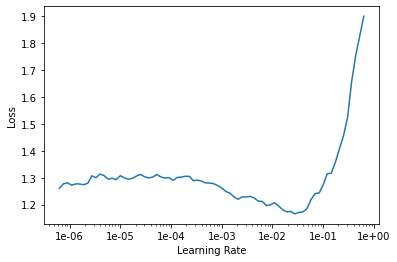

In [9]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.135224,0.684075,0.713450,02:53
1,0.965056,0.599782,0.721248,00:27
2,0.834278,0.697595,0.693957,00:27
3,0.761434,0.530894,0.756335,00:27
4,0.690229,0.568003,0.721248,00:28
5,0.646084,0.510873,0.732943,00:28
6,0.582645,0.446267,0.783626,00:28
7,0.541887,0.437364,0.797271,00:28


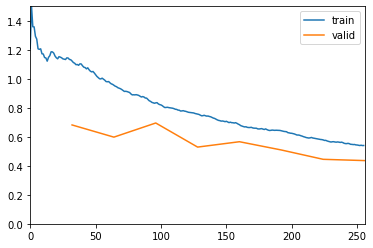

In [10]:
learner.fit_one_cycle(8, max_lr=slice(1e-04 , 1e-02 ))

In [17]:
learn.save('one-epoch')

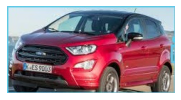

In [25]:
path =  "/content/drive/My Drive/Aug/classify/test"
img = open_image(get_image_files(path)[0])
img.show()

In [26]:
learn.load('one-epoch')
pred_class,pred_idx,outputs = learn.predict(img)
pred_class
outputs

tensor([0.0279, 0.9721])